In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import re
from collections import *

In [41]:
metricsframe = pd.read_csv("Neighborhood_Metrics.csv", low_memory=False)
curbframe = pd.read_csv("Neighborhood_Curbside_Recycling_Rates.csv", low_memory=False)

In [42]:
# Combine all the monthly statistics into one average

i = 0
aveRates = {}
sumRecycle = 0 
sumGarbage = 0
for i in range(len(curbframe)):
    sumRecycle += curbframe['CURBSIDE RECYCLING (IN POUNDS)'][i]
    sumGarbage += curbframe['CURBSIDE GARBAGE (IN POUNDS)'][i]
    if i == 623:
        break
    if curbframe['NEIGHBORHOOD'][i] != curbframe['NEIGHBORHOOD'][i+1]:
        aveRates.update({curbframe['NEIGHBORHOOD'][i] : sumRecycle/(sumRecycle+sumGarbage)})
        sumRecycle = 0 
        sumGarbage = 0
aveRates.update({curbframe['NEIGHBORHOOD'][i] : sumRecycle/(sumRecycle+sumGarbage)})

Text(0, 0.5, 'curbside recycling rate')

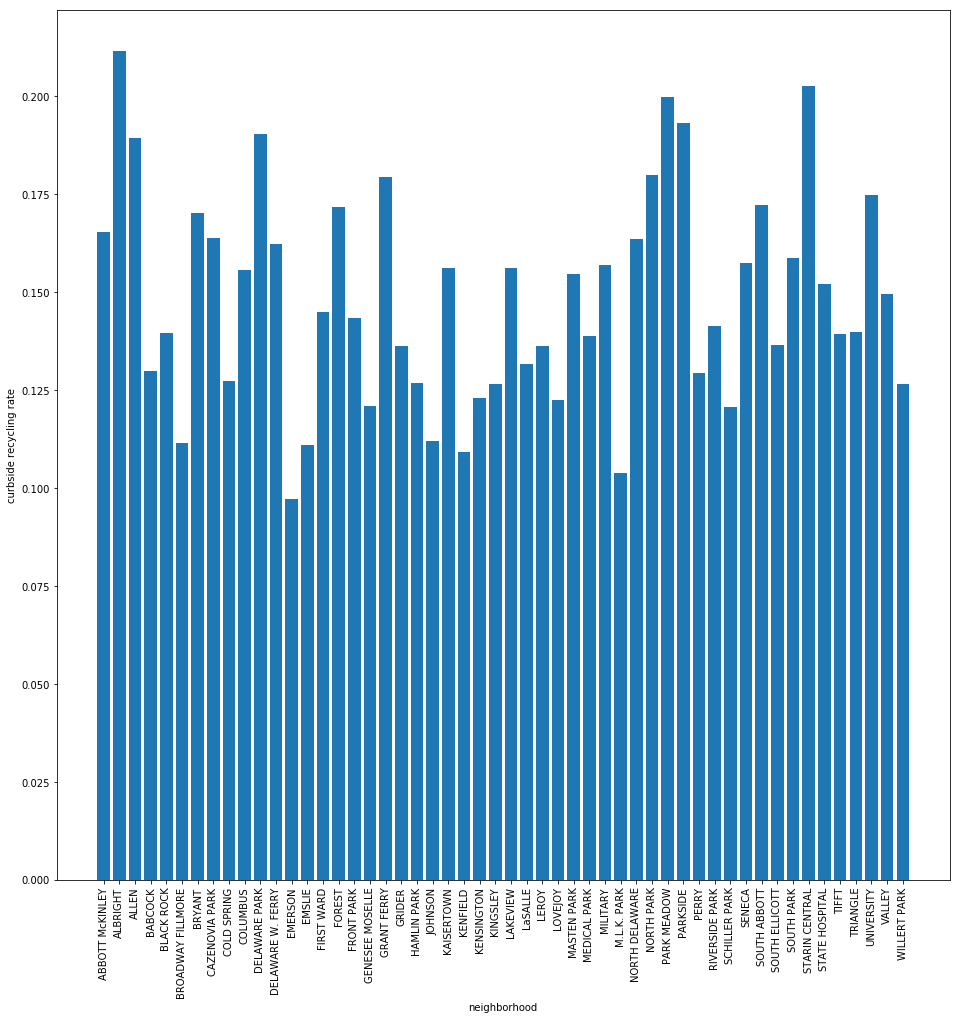

In [43]:
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar(aveRates.keys(),aveRates.values())
plt.xlabel('neighborhood')
plt.ylabel('curbside recycling rate')

Text(0, 0.5, 'curbside recycling rate')

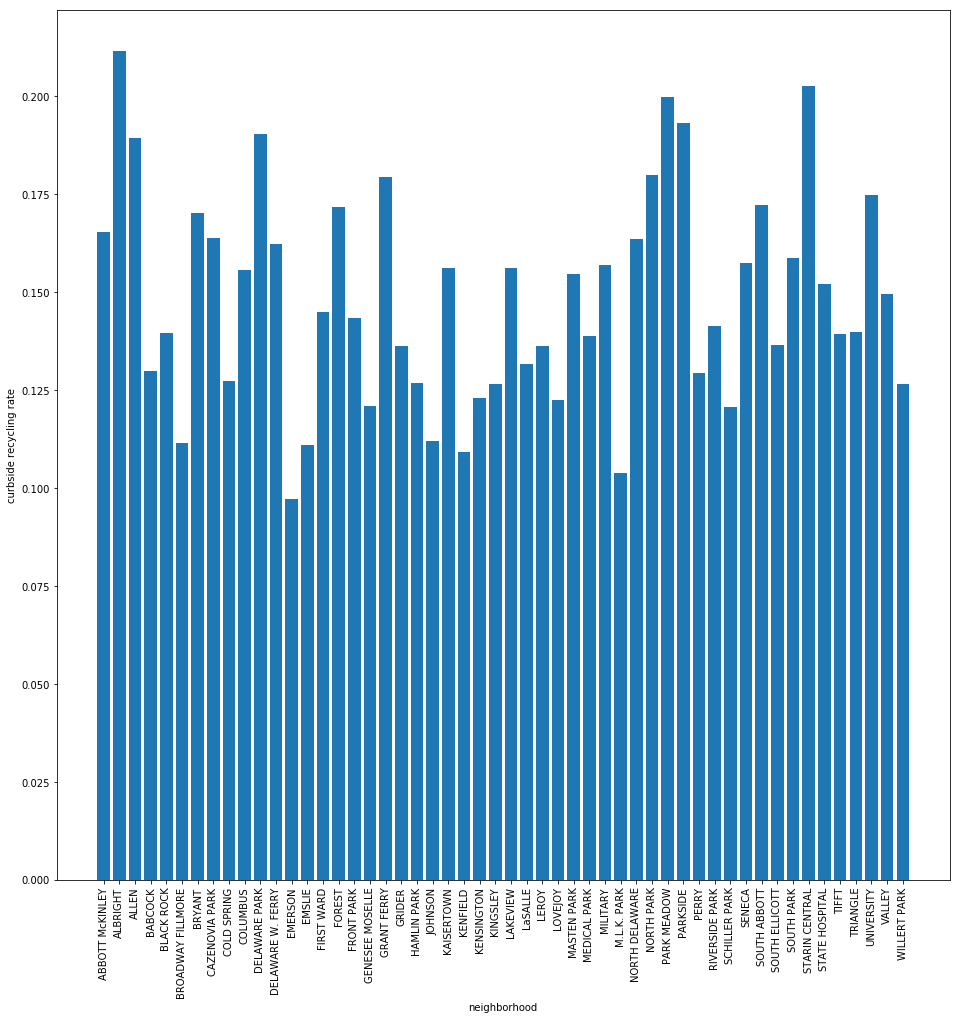

In [44]:
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar(aveRates.keys(),aveRates.values())
plt.xlabel('neighborhood')
plt.ylabel('curbside recycling rate')

In [45]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
sortedrates = sorted(aveRates.items(), key=lambda x: x[1])

<BarContainer object of 52 artists>

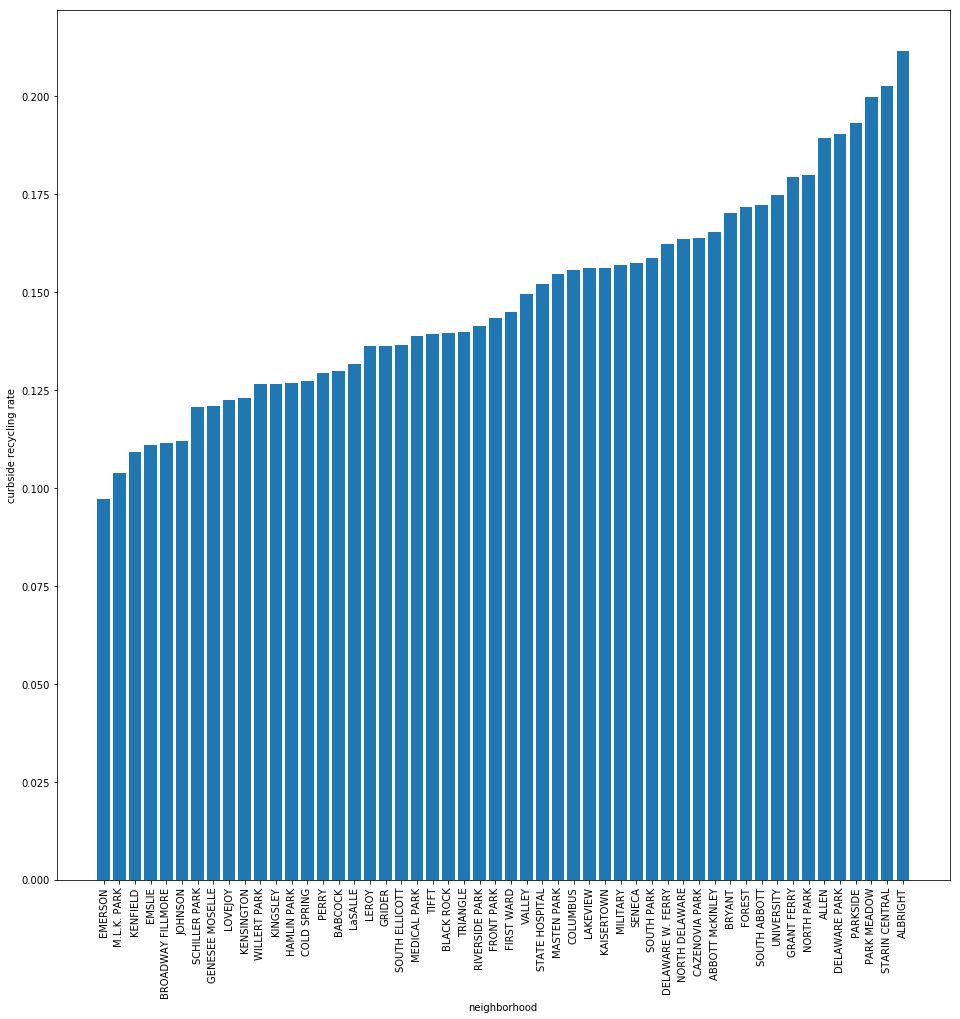

In [46]:
nabes = [x[0] for x in sortedrates]
rates = [x[1] for x in sortedrates]
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.xlabel('neighborhood')
plt.ylabel('curbside recycling rate')
plt.bar(nabes, rates)

In [47]:
yearlydata = {}
i = 0
while(i < 624):
    yearlydata.update({curbframe['NEIGHBORHOOD'][i] : curbframe.iloc[i:i+12].sum()[2:4]})
    i += 12

In [48]:
def nabefuse(*x):
    cr = 0
    cg = 0
    for arg in x:
        cr += arg[0]
        cg += arg[1]
    return cr * 100 / (cr + cg)

In [49]:
def dictupdate(dic, name, rate):
    dic.update({name : rate})

# final dict of combined nabes and rates
a = {}

YD = yearlydata
dictupdate(a, 'ALLENTOWN', nabefuse(yearlydata['ALLEN']))
dictupdate(a, 'RIVERSIDE', nabefuse(yearlydata['RIVERSIDE PARK']))
dictupdate(a, 'BLACK ROCK', nabefuse(yearlydata['BLACK ROCK']))
dictupdate(a, 'WEST HERTEL', nabefuse(yearlydata['MILITARY']))
dictupdate(a, 'NORTH PARK', nabefuse(yearlydata['NORTH DELAWARE'], yearlydata['NORTH PARK']))
dictupdate(a, 'CENTRAL PARK', nabefuse(yearlydata['STARIN CENTRAL']))
dictupdate(a, 'KENFIELD', nabefuse(yearlydata['KENFIELD']))
dictupdate(a, 'UNIVERSITY HIGHTS/KENSINGTON-BAILEY', nabefuse(yearlydata['UNIVERSITY'], YD['KENSINGTON'], YD['LaSALLE']))
dictupdate(a, 'SENECA-CAZENOVIA', nabefuse(YD['SENECA'], YD['CAZENOVIA PARK']))
dictupdate(a, 'HOPKINS TIFFT/SOUTH PARK', nabefuse(YD['TIFFT'], YD['SOUTH PARK'], YD['ABBOTT McKINLEY'], YD['SOUTH ABBOTT']))
dictupdate(a, 'PRATT-WILLERT/FRUIT BELT', nabefuse(YD['WILLERT PARK'], YD['MEDICAL PARK']))
dictupdate(a, 'MASTEN PARK', nabefuse(YD['MASTEN PARK'], YD['KINGSLEY'], YD['COLD SPRING']))
dictupdate(a, 'GENESEE-MOSELLE/SCHILER PARK', nabefuse(YD['GENESEE MOSELLE'], YD['SCHILLER PARK'], YD['EMERSON']))
dictupdate(a, 'BROADWAY-FILLMORE/LOVEJOY/BABCOCK', nabefuse(YD['EMSLIE'], YD['JOHNSON'], YD['BROADWAY FILLMORE'], YD['LOVEJOY'], YD['BABCOCK'], YD['VALLEY']))
dictupdate(a, 'KAISERTOWN', nabefuse(YD['KAISERTOWN']))
dictupdate(a, 'DELAVAN-GRIDER', nabefuse(YD['GRIDER']))
dictupdate(a, 'MLK PARK', nabefuse(YD['M.L.K. PARK']))
dictupdate(a, 'FILLMORE-LEROY', nabefuse(YD['BROADWAY FILLMORE']))
dictupdate(a, 'PARKSIDE', nabefuse(YD['PARKSIDE'], YD['PARK MEADOW'], YD['DELAWARE PARK']))
dictupdate(a, 'ELMWOOD/WEST SIDE', nabefuse(YD['ALBRIGHT'], YD['BRYANT'], YD['DELAWARE W. FERRY'], YD['STATE HOSPITAL'], YD['GRANT FERRY'], YD['FOREST'], YD['FRONT PARK']))
dictupdate(a, 'LOWER WEST SIDE', nabefuse(YD['LAKEVIEW'], YD['COLUMBUS']))
dictupdate(a, '1ST WARD/ELLICOTT', nabefuse(YD['FIRST WARD'], YD['PERRY'], YD['SOUTH ELLICOTT']))
dictupdate(a, 'HAMLIN PARK', nabefuse(YD['HAMLIN PARK']))


Text(0, 0.5, 'Curbside Recycling Rate')

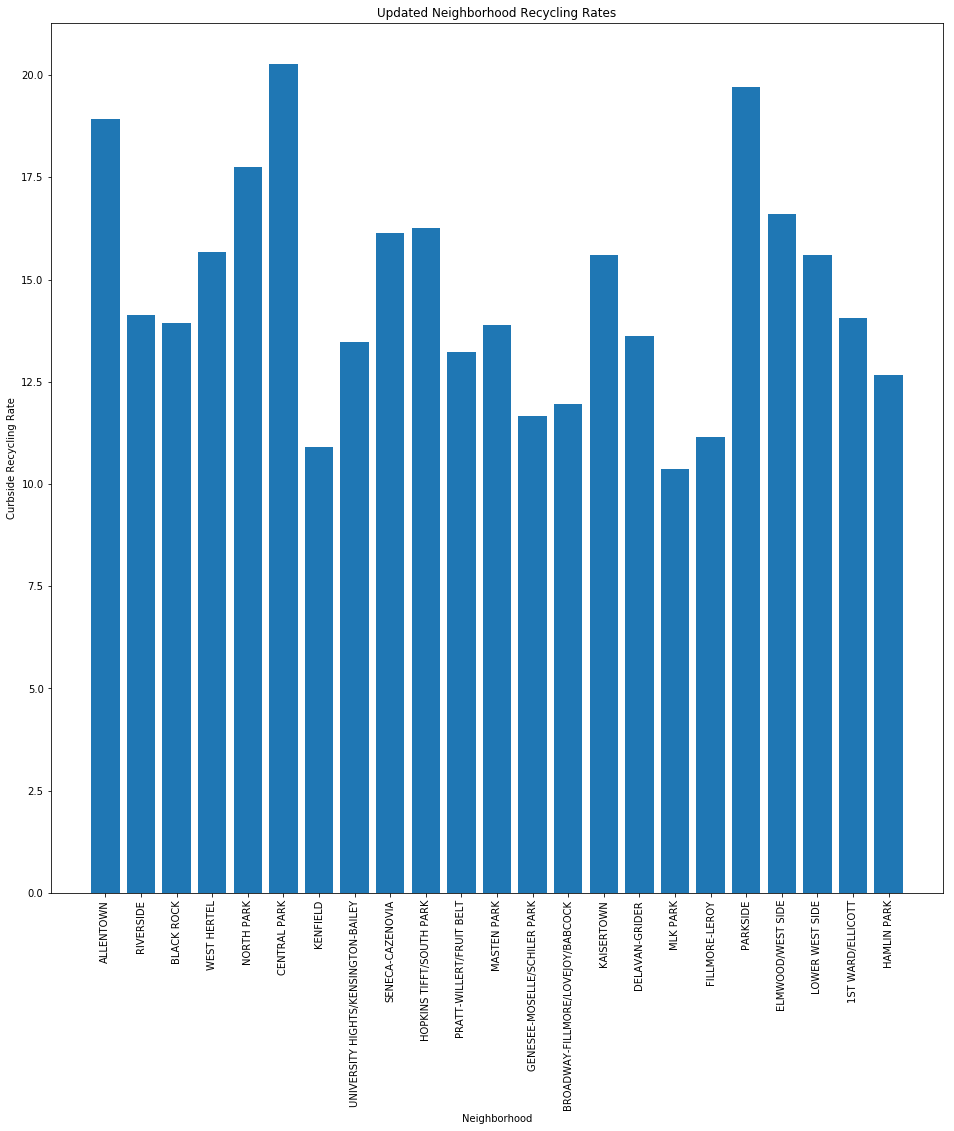

In [50]:
fig = plt.subplots(figsize=(16,16))
plt.xticks(rotation='vertical')
plt.bar(a.keys(),a.values())
plt.title('Updated Neighborhood Recycling Rates')
plt.xlabel('Neighborhood')
plt.ylabel('Curbside Recycling Rate')

In [51]:
# Forgive me
import collections
def nabefuse2(*x):    
    d = OrderedDict([('total persons', 0), ('males', 0), ('females',0), ('under25',0), ('25to44',0),('45to64',0),('senior',0), 
        ('white',0),('black',0),('latinx',0),('asian',0),('otherrace',0),('totoccunits',0),('numoccunits',0),('numvacantunits',0),
        ('othervacant',0),('totunits',0),('1unit',0),('2unit',0),('3to19unit',0),('20plusunit',0),('21stcenthouse',0),
        ('post70shouse',0),('post40shouse',0),('oldhouse',0),('owners',0),('renters',0),('nocars',0),('1car',0),('2pluscars',0),
        ('families',0),('famwithkids',0),('marriedwithkids',0),('singles',0),('foreign',0),('nohs',0),('hs',0),('assocs',0),
        ('bachelors',0),('grads',0),('nonfamilies',0),('loners',0),('friends',0),('lonelyseniors',0)])
    for arg in x:
        i = 0
        for key in d:
            d.update({str(key):d[str(key)]+arg[i]})
            i += 1
            
    return d

In [52]:
metricsframe = pd.read_csv("Neighborhood_Metrics.csv", low_memory=False)
metricsframe.insert(0,'NA',np.zeros(35).reshape(35,1))
numetricsframe = metricsframe.set_index('Neighborhood')
# numetricsframe.iloc[:,0:11]
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,0:11],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,2:23:2],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,14:20:2],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,18:43:2],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,30:38],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,31:50:2],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,42:65:2],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,53:56],axis=1)
numetricsframe = numetricsframe.drop(numetricsframe.iloc[:,41:49],axis=1)

## Neighborhood match guide

RIVERSIDE = RIVERSIDE

BLACK ROCK + GRANT-AMHERST = BLACK ROCK

WEST HERTEL = MILITARY

N PARK = N DELAWARE + N PARK

CENTRAL PARK = STARIN CENTRAL

KENFIELD = KENFIELD

UNIV HEIGHTS + KENSINGTON-BAILEY = UNIV HEIGHTS + KENSINGTON + LASALLE

SENECA-CAZENOVIA = SENECA + CAZENOVIA PARK

HOPKINS TIFFT + S PARK = TIFFT + S PARK + ABBOT + MCKINLEY PARK + S ABOTT

PRATT-WILLERT + FRUIT BELT = WILLERT PARK + MEDICAL PARK

MASTEN PARK = MASTEN PARK + KINGSLEY + COLD SPRING

GENNESSEE MOSELLE + SCHILLER PARK = GENNESSEE MOSELLE + SCHILLER PARK + EMERSON

BROADWAY FILLMORE + LOOVEJOY + SENECA + BABCOCK = EMSLIE + JOHNSON + BROADWAY-FILLMORE + LOVEJOY + BABCOCK + VALLEY

KAISERTOWN = KAISERTOWN

DELAVAN-GRIDER = GRIDER

MLK PARK = MLK PARK

FILLMORE-LEROY = FILLMORE

PARKSIDE = PARKSIDE + PARK MEADOW + DELAWARE PARK

ELMWOOD BIDWELL + ELMWOOD BRYANT + UWS + WS = ALBRIGHT + BRYANT + DELAWARE-W FERRY + STATE HOSPITAL + GRANT-FERRY + FOREST + FRONT PARK
                                              
ALLENTOWN = ALLEN

LWS = LAKEVIEW + COLUMBUS

1ST WARD + CENTRAL + ELLICOTT = 1ST WARD + PERRY + S ELLICOTT

In [54]:
# transform data frame to be combined with recycling rates. Unfortunately tedious.
import collections
nmf = numetricsframe

def nurow(*x):
    row = np.zeros(45)
    for arg in x:
        row += nmf.loc[arg].values


nmf = nmf.rename(index={'Allentown':'ALLENTOWN'})
nmf = nmf.rename(index={'Riverside':'RIVERSIDE'})
nmf = nmf.rename(index={'Hamlin Park':"HAMLIN PARK"})
nmf = nmf.rename(index={'West Hertel': 'WEST HERTEL'})
nmf.loc['Black Rock'] += nmf.loc['Grant-Amherst']
nmf = nmf.rename(index={'Black Rock': 'BLACK ROCK'})
nmf = nmf.drop('Grant-Amherst')
nmf = nmf.rename(index={'North Park':'NORTH PARK'})
nmf = nmf.rename(index={'Central Park': 'CENTRAL PARK'})
nmf = nmf.rename(index={'Kenfield':"KENFIELD"})
nmf.loc['University Heights'] += nmf.loc['Kensington-Bailey']
nmf = nmf.rename(index={'University Heights':'UNIVERSITY HEIGHTS/KENSINGTON-BAILEY'})
nmf = nmf.drop(index='Kensington-Bailey')
nmf = nmf.rename(index={'Seneca-Cazenovia':"SENECA-CAZENOVIA"})
nmf.loc['Hopkins-Tifft'] += nmf.loc['South Park']
nmf = nmf.rename(index={'Hopkins-Tifft':'HOPKINS-TIFFT/SOUTH PARK'})
nmf = nmf.drop('South Park')
nmf.loc['Pratt-Willert'] += nmf.loc['Fruit Belt']
nmf = nmf.rename(index={'Pratt-Willert':'PRATT-WILLERT/FRUIT BELT'})
nmf = nmf.drop('Fruit Belt')
nmf = nmf.rename(index={'Masten Park':"MASTEN PARK"})
nmf.loc['Genesee-Moselle'] += nmf.loc['Schiller Park']
nmf = nmf.rename(index={'Genesee-Moselle':'GENNESSEE/SCHILLER PARK'})
nmf = nmf.drop('Schiller Park')
nmf.loc['Broadway Fillmore'] += nmf.loc['Lovejoy'] + nmf.loc['Seneca Babcock']
nmf = nmf.rename(index={'Broadway Fillmore':'BROADWAY-FILLMORE/LOVEJOY/BABCOCK'})
nmf = nmf.drop(['Lovejoy','Seneca Babcock'])
nmf = nmf.rename(index={"Kaisertown":"KAISERTOWN"})
nmf = nmf.rename(index={"Delavan Grider":"DELAVAN-GRIDER"})
nmf = nmf.rename(index={"MLK Park":"MLK PARK"})
nmf = nmf.rename(index={'Fillmore-Leroy':"FILLMORE-LEROY"})
nmf = nmf.rename(index={'Parkside':"PARKSIDE"})
nmf.loc['Elmwood Bidwell'] += nmf.loc['Elmwood Bryant'] + nmf.loc['Upper West Side'] + nmf.loc['West Side']
nmf = nmf.rename(index={"Elmwood Bidwell":"ELMWOOD/WEST SIDE"})
nmf = nmf.drop(['Elmwood Bryant','Upper West Side','West Side'])
nmf = nmf.rename(index={"Lower West Side":"LOWER WEST SIDE"})
nmf.loc['First Ward'] += nmf.loc['Central'] + nmf.loc['Ellicott']
nmf = nmf.rename(index={"First Ward":"1ST WARD/ELLICOTT"})
nmf = nmf.drop(['Central','Ellicott'])
a = OrderedDict(sorted(a.items()))
nmf = nmf.sort_index(level=a.keys())
nmf['Curbside Recycling rate'] = a.values()
nmf['Curbside Recycling rate']

Neighborhood
1ST WARD/ELLICOTT                       14.054051
ALLENTOWN                               18.922150
BLACK ROCK                              13.942802
BROADWAY-FILLMORE/LOVEJOY/BABCOCK       11.953814
CENTRAL PARK                            20.260279
DELAVAN-GRIDER                          13.630463
ELMWOOD/WEST SIDE                       16.605044
FILLMORE-LEROY                          11.147475
GENNESSEE/SCHILLER PARK                 11.657536
HAMLIN PARK                             12.665369
HOPKINS-TIFFT/SOUTH PARK                16.260951
KAISERTOWN                              15.610098
KENFIELD                                10.912553
LOWER WEST SIDE                         15.596462
MASTEN PARK                             13.897922
MLK PARK                                10.369953
NORTH PARK                              17.743735
PARKSIDE                                19.708866
PRATT-WILLERT/FRUIT BELT                13.216167
RIVERSIDE                            

In [55]:
a

OrderedDict([('1ST WARD/ELLICOTT', 14.05405101254213),
             ('ALLENTOWN', 18.922149758795822),
             ('BLACK ROCK', 13.942801661219047),
             ('BROADWAY-FILLMORE/LOVEJOY/BABCOCK', 11.953813606769792),
             ('CENTRAL PARK', 20.260279441117763),
             ('DELAVAN-GRIDER', 13.630463183641439),
             ('ELMWOOD/WEST SIDE', 16.605044070696426),
             ('FILLMORE-LEROY', 11.147475454068504),
             ('GENESEE-MOSELLE/SCHILER PARK', 11.657536063764631),
             ('HAMLIN PARK', 12.665369363717017),
             ('HOPKINS TIFFT/SOUTH PARK', 16.26095148906402),
             ('KAISERTOWN', 15.61009773524922),
             ('KENFIELD', 10.912552608724699),
             ('LOWER WEST SIDE', 15.59646216832828),
             ('MASTEN PARK', 13.897921717303289),
             ('MLK PARK', 10.36995307489445),
             ('NORTH PARK', 17.74373452498891),
             ('PARKSIDE', 19.708866387760462),
             ('PRATT-WILLERT/FRUIT BELT', 13.

In [56]:
order = a.keys()
nmf.sort_index(level=order)

,Total Persons,Male Persons,Female Persons,Age < 24,Age 25 to 44,Age 45 to 64,Age 65 >,White,Black,Latinx,...,High School Education,Associates Education,Bachelors Education,Graduate Education,Total Households,Total Non-Family Households,Total Living Alone,Total Not Living Alone,Total Living Alone Senior,Curbside Recycling rate
Neighborhood,,,,,,,,,,,,,,,,,,,,,
1ST WARD/ELLICOTT,8373.0,4145.0,4228.0,2655.0,2468.0,2171.0,1079.0,3998.0,2382.0,1611.0,...,1728.075238,332.116897,453.780908,403.564779,3779.0,2064.0,1783.0,281.0,490.0,14.054051
ALLENTOWN,3363.0,1840.0,1523.0,1031.0,1450.0,679.0,203.0,2582.0,260.0,292.0,...,594.250429,165.159520,446.092624,554.579760,1888.0,1427.0,1119.0,308.0,80.0,18.922150
BLACK ROCK,7830.0,3737.0,4093.0,3303.0,2277.0,1596.0,654.0,3408.0,1069.0,2406.0,...,1728.139606,206.409739,384.134894,132.336988,3282.0,1541.0,1401.0,140.0,367.0,13.942802
BROADWAY-FILLMORE/LOVEJOY/BABCOCK,20562.0,9788.0,10774.0,7396.0,5524.0,5163.0,2479.0,9768.0,7452.0,1093.0,...,5054.292699,783.141666,567.682980,223.534011,8519.0,3883.0,3423.0,460.0,1164.0,11.953814
CENTRAL PARK,5878.0,2983.0,2895.0,1161.0,2135.0,1839.0,743.0,4546.0,895.0,177.0,...,952.403646,164.403010,695.234047,508.670129,2431.0,1143.0,812.0,331.0,149.0,20.260279
DELAVAN-GRIDER,5501.0,2300.0,3201.0,1919.0,1020.0,1544.0,1018.0,102.0,5104.0,56.0,...,1329.768844,301.494137,235.604690,118.467895,2384.0,875.0,798.0,77.0,226.0,13.630463
ELMWOOD/WEST SIDE,47169.0,23670.0,23499.0,17767.0,15020.0,9152.0,5230.0,23797.0,8807.0,7745.0,...,6544.538915,1390.807504,4292.538668,4021.770152,19750.0,11530.0,8881.0,2649.0,2481.0,16.605044
FILLMORE-LEROY,5458.0,2566.0,2892.0,1974.0,1446.0,1171.0,867.0,569.0,4289.0,229.0,...,1412.210103,188.907864,273.810275,154.946900,2465.0,1114.0,975.0,139.0,416.0,11.147475
GENNESSEE/SCHILLER PARK,16683.0,7595.0,9088.0,6999.0,4023.0,4126.0,1535.0,2119.0,12898.0,810.0,...,3722.057700,640.206446,468.637764,281.808406,6634.0,2784.0,2517.0,267.0,591.0,11.657536


In [57]:
nmf['% Male Persons'] = (nmf['Male Persons'].values)/(nmf['Total Persons'].values)
nmf['% Female Persons'] = nmf['Female Persons'] / nmf['Total Persons']
nmf['% Age < 24'] = nmf['Age < 24']/nmf['Total Persons']
nmf['% Age 25 to 44'] = nmf['Age 25 to 44'] / nmf['Total Persons']
nmf['% Age 45 to 64'] = nmf['Age 45 to 64'] / nmf['Total Persons']
nmf['% Age > 65'] = nmf['Age 65 >'] / nmf['Total Persons']
nmf['% White'] = nmf['White'] / nmf['Total Persons']
nmf['% Black'] = nmf['Black'] / nmf['Total Persons']
nmf['% Latinx'] = nmf['Latinx']  / nmf['Total Persons']
nmf['% Asian'] = nmf['Asian'] / nmf['Total Persons']
nmf['% Other Race'] = nmf['Other'] / nmf['Total Persons']
nmf['% Vacant Units'] = nmf['Vacant Units'] / nmf['Total Occupancy Units']
nmf['% 1 Unit Structure'] = nmf['1 Unit Structure'] / nmf['Total Units in Structure']
nmf['% 2 Unit Structure'] = nmf['2 Unit Structure'] / nmf['Total Units in Structure']
nmf['% 3 to 19 Unit Structure'] = nmf['3 to 19 Unit Structure'] / nmf['Total Units in Structure']
nmf['% 20 Plus Unit Structure'] = nmf['20 or More Unit Structure'] / nmf['Total Units in Structure']
nmf['% of Structure Built 2000-2015'] = nmf['Built 2000-2015'] / nmf['Total Occupancy Units']
nmf['% of Structures Buildt 1970-1999'] = nmf['Built 1970-1999'] / nmf['Total Occupancy Units']
nmf['% of Structures built 1940-1979'] = nmf['Built 1940-1969'] / nmf['Total Occupancy Units']
nmf['% of Structures Built Pre-1940'] = nmf['Built Before 1940'] / nmf['Total Occupancy Units']
nmf['% Owner Tenure'] = nmf['Owner Tenure'] / nmf['Occupied Units']
nmf['% Renter Tenure'] = nmf['Renter Tenure'] / nmf['Occupied Units']
nmf['% 0 Available Vehicle'] = nmf['0 Available Vehicle'] / nmf['Occupied Units']
nmf['% 1 Available Vehicle'] = nmf['1 Available Vehicle'] / nmf['Occupied Units']
nmf['% 2+ Available Vehicles'] = nmf['2 orMore Available Vehicle'] / nmf['Occupied Units']
nmf['% Family Household'] = nmf['Family Households'] / nmf['Occupied Units']
nmf['% Family Households with Children'] = nmf['Family W/Children Households'] / nmf['Occupied Units']
nmf['% Married Family Households with Children'] = nmf['Married Family W/Children Households'] / nmf['Occupied Units']
nmf['% Single Person Households'] = nmf['Single Person Households'] / nmf['Occupied Units']
nmf['% Foreign Born'] = nmf['Foreign Born'] / nmf['Occupied Units']
nmf['% < High School Education']  = nmf['< High School Education'] / nmf['Occupied Units']
nmf['% HS Education'] = nmf['High School Education'] / nmf['Occupied Units']
nmf['% Associate Degrees'] = nmf['Associates Education'] / nmf['Occupied Units']
nmf['% Bachelors Degrees'] = nmf['Bachelors Education'] / nmf['Occupied Units']
nmf['% Grad Degrees'] = nmf['Graduate Education'] / nmf['Occupied Units']
nmf['% Non-Family Households'] = nmf['Total Non-Family Households'] / nmf['Occupied Units']
nmf['% Living Alone'] = nmf['Total Living Alone'] / nmf['Total Non-Family Households']
nmf['% Living with Others'] = nmf['Total Not Living Alone'] / nmf['Total Non-Family Households']
nmf['% Senior Living Alone'] = nmf['Total Living Alone Senior'] / nmf['Total Non-Family Households']
ratesframe = nmf.iloc[:,45:]
ratesframe

,Curbside Recycling rate,% Male Persons,% Female Persons,% Age < 24,% Age 25 to 44,% Age 45 to 64,% Age > 65,% White,% Black,% Latinx,...,% Foreign Born,% < High School Education,% HS Education,% Associate Degrees,% Bachelors Degrees,% Grad Degrees,% Non-Family Households,% Living Alone,% Living with Others,% Senior Living Alone
Neighborhood,,,,,,,,,,,,,,,,,,,,,
1ST WARD/ELLICOTT,14.054051,0.495044,0.504956,0.317091,0.294757,0.259286,0.128867,0.477487,0.284486,0.192404,...,0.080942,0.227960,0.457284,0.087885,0.120080,0.106791,0.546176,0.863857,0.136143,0.237403
ALLENTOWN,18.922150,0.547131,0.452869,0.306572,0.431163,0.201903,0.060363,0.767767,0.077312,0.086827,...,0.060660,0.067753,0.314751,0.087479,0.236278,0.293739,0.755826,0.784163,0.215837,0.056062
BLACK ROCK,13.942802,0.477267,0.522733,0.421839,0.290805,0.203831,0.083525,0.435249,0.136526,0.307280,...,0.134356,0.253193,0.526551,0.062891,0.117043,0.040322,0.469531,0.909150,0.090850,0.238157
BROADWAY-FILLMORE/LOVEJOY/BABCOCK,11.953814,0.476024,0.523976,0.359693,0.268651,0.251094,0.120562,0.475051,0.362416,0.053156,...,0.081132,0.221898,0.593296,0.091929,0.066637,0.026239,0.455805,0.881535,0.118465,0.299768
CENTRAL PARK,20.260279,0.507486,0.492514,0.197516,0.363219,0.312862,0.126404,0.773392,0.152263,0.030112,...,0.080640,0.045368,0.391774,0.067628,0.285987,0.209243,0.470177,0.710411,0.289589,0.130359
DELAVAN-GRIDER,13.630463,0.418106,0.581894,0.348846,0.185421,0.280676,0.185057,0.018542,0.927831,0.010180,...,0.017270,0.167225,0.557789,0.126466,0.098827,0.049693,0.367030,0.912000,0.088000,0.258286
ELMWOOD/WEST SIDE,16.605044,0.501813,0.498187,0.376667,0.318429,0.194026,0.110878,0.504505,0.186712,0.164197,...,0.170111,0.177233,0.331369,0.070421,0.217344,0.203634,0.583797,0.770252,0.229748,0.215178
FILLMORE-LEROY,11.147475,0.470136,0.529864,0.361671,0.264932,0.214547,0.158849,0.104251,0.785819,0.041957,...,0.057164,0.176521,0.572905,0.076636,0.111079,0.062859,0.451927,0.875224,0.124776,0.373429
GENNESSEE/SCHILLER PARK,11.657536,0.455254,0.544746,0.419529,0.241144,0.247318,0.092010,0.127016,0.773122,0.048552,...,0.049222,0.229317,0.561058,0.096504,0.070642,0.042479,0.419656,0.904095,0.095905,0.212284


In [58]:
ratesframe.corr()['Curbside Recycling rate']

Curbside Recycling rate                      1.000000
% Male Persons                               0.622357
% Female Persons                            -0.622357
% Age < 24                                  -0.609417
% Age 25 to 44                               0.738623
% Age 45 to 64                               0.237768
% Age > 65                                  -0.266532
% White                                      0.776029
% Black                                     -0.749524
% Latinx                                     0.158638
% Asian                                      0.027839
% Other Race                                 0.183251
% Vacant Units                              -0.465041
% 1 Unit Structure                           0.071515
% 2 Unit Structure                          -0.429565
% 3 to 19 Unit Structure                     0.237514
% 20 Plus Unit Structure                     0.225532
% of Structure Built 2000-2015              -0.100467
% of Structures Buildt 1970-

Interpreting the above results, the strongest correlation seems to be that areas which have higher proportions of individuals who've received at least bachelors degrees tend to have higher recycling rates than those areas that don't. It is interesting how strong this correlation is to me, and I would like to try an eliminate some potential confounding factors to determine how close the relationship is. 

I did some research into it and found that just a few years ago, the state of recycling in Buffalo public schools was in a much worse place than today: http://www.investigativepost.org/2012/11/02/schools-recycling/

At the time of that article, only 5 Buffalo public schools had green totes. Last year, 196 additional totes were put into 32 schools that participated in the Environmental Champions program. This program incentivizes schools to update their recycling policies towards diverting more away from landfills. Since the year the above article was written, Buffalo's overall recycling rate has climbed from 15.9% to 28%, a major leap forward. 

https://www.buffalony.gov/CivicAlerts.aspx?AID=239

I am somewhat unsure of where to go from here to develop some meaningful conclusions. I do have some other datasets that I want to try and compare this to but haven't run any analysis yet. Off of the r-values, the biggest suggestion I would have for the city is to ensure that high schoolers are educated about recycling through coursework and example set by school policy, which appears to already be happening. I am also trying to consider what kind of incentive (that the city could provide) would cause adults without any college education to recycle more. There is currently a contest for block clubs to recycle more which awards the winner with $100 worth of beautification equipment, but it seems to me that the city could do more.

https://buffalonews.com/2018/06/08/want-to-help-buffalo-boost-recycling-rates-here-how/

It's also somewhat interesting that there's a strong correlation of recycling with areas with a lot of 25-44 year olds. I would have expected that to be the age group that recycles the most, but not to such a strong degree. Also surprising was just how negative the correlation is for under 25s, I would have possibly guessed that it would be positive. I'm not too sure why it's so low and would like to explore that further. I notice that family households with childred correlate strongly with lower recycling rates, but married families with children correlate with higher.

Regarding the strong correlation between recycling rate and proportion of households with two+ vehicles, I think that it is mostly a reflection of there being higher recycling rates in wealthier areas.

Singles households with multiple people also have a pretty strong likelihood to recycle than singles living alone. That makes a lot of sense to me, as there's increased social pressure to recycle and it can be logistically easier with more hands.